In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings
#import analyse_sampling_dataset

# DataSet preparation (preprocessing + sampling)

In [2]:
df = pd.read_csv('/home/jbara/Desktop/scripts/HAMID/HAMID/datasets/south+german+credit/SouthGermanCredit.asc', sep=' ', header=0)

In [3]:
#rename the target to 'class_label
df.rename(columns={'kredit': 'class_label'}, inplace=True)

In [4]:
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,class_label
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [5]:
df['class_label'] = df['class_label'].replace({1: 0, 0: 1})

In [6]:
# Print the imbalance ratio in the dataset
count = df['class_label'].value_counts()
imbalance_ratio = count.max() / count.min()
print("Imbalance ratio:", imbalance_ratio)

Imbalance ratio: 2.3333333333333335


In [7]:
count

class_label
0    700
1    300
Name: count, dtype: int64

In [8]:
# Scaling numerical features
scaler = MinMaxScaler()
exclude = ['class_label']
cols_to_scale = df.columns.difference(exclude)
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [9]:
# Define features and target variable
X = df.drop(columns=['class_label'])
y = df['class_label']

In [10]:
# Perform stratified sampling
X_train, X_subset, y_train, y_subset = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
# Preparing the subset that we will consider as the datase
X_subset.reset_index(drop=True, inplace=True)
y_subset.reset_index(drop=True, inplace=True)

In [12]:
# Concatenate features and labels into a single DataFrame
df_train = pd.concat([X_subset, y_subset], axis=1).reset_index(drop=True)

In [13]:
count2 = df_train['class_label'].value_counts()
count2

class_label
0    140
1     60
Name: count, dtype: int64

In [14]:
386*35

13510

In [15]:
60*60

3600

In [16]:
(140*30)/3600

1.1666666666666667

In [17]:
def columns_of_concatenated_ds(df_train):
    c = list(df_train.columns.drop(['class_label']))
    columns = c + [e + '_N' for e in c] + ['class_label']
    return columns

In [18]:
columns = columns_of_concatenated_ds(df_train)

# Concatenated Datasets generation

In [34]:
config_GA = {
    'pop_size': 50,
    'individual_size': 30,
    'num_generations': 10,
    'mutation_rate': 0.05,
    'crossover_type': 'two-point',
    'stagnation_limit': 7  # Number of generations with no improvement
}

## Random selection of Set_N

In [35]:
import Set_N_random_selection
train_C_random = Set_N_random_selection.main(df_train, columns, config_GA)

## Weighted selection of Set_N

In [36]:
import Set_N_weighted_selection
train_C_weighted = Set_N_weighted_selection.main(df_train, columns, config_GA)

## Fix the initial conditions for the GA algorithm

In [37]:
 import select_potential_indecies
import initial_population
N = df_train[df_train['class_label'] == df_train['class_label'].value_counts().idxmax()].reset_index(drop=True)
potential_indices = select_potential_indecies.weight_calculation(df_train, N)

population = initial_population.initialize_population(config_GA['pop_size'],
                                                          potential_indices,
                                                          config_GA['individual_size'])



## GA1

2024-05-29 14:21:42,200 - INFO - Initializing GA with population size: 50
2024-05-29 14:23:23,861 - INFO - New best fitness found: 0.001179
2024-05-29 14:23:23,862 - INFO - Generation 0 complete. Best fitness: 0.001179


time taken in generation 0 : 101.6611 seconds


2024-05-29 14:25:05,827 - INFO - New best fitness found: 0.000698
2024-05-29 14:25:05,827 - INFO - Generation 1 complete. Best fitness: 0.000698


time taken in generation 1 : 101.9650 seconds


2024-05-29 14:26:43,648 - INFO - Generation 2 complete. Best fitness: 0.000698


time taken in generation 2 : 97.8206 seconds


2024-05-29 14:28:22,211 - INFO - New best fitness found: 0.000611
2024-05-29 14:28:22,211 - INFO - Generation 3 complete. Best fitness: 0.000611


time taken in generation 3 : 98.5622 seconds


2024-05-29 14:29:59,142 - INFO - New best fitness found: 0.000460
2024-05-29 14:29:59,142 - INFO - Generation 4 complete. Best fitness: 0.000460


time taken in generation 4 : 96.9307 seconds


2024-05-29 14:31:38,788 - INFO - Generation 5 complete. Best fitness: 0.000460


time taken in generation 5 : 99.6452 seconds


2024-05-29 14:33:20,960 - INFO - New best fitness found: 0.000429
2024-05-29 14:33:20,961 - INFO - Generation 6 complete. Best fitness: 0.000429


time taken in generation 6 : 102.1722 seconds


2024-05-29 14:35:04,051 - INFO - New best fitness found: 0.000341
2024-05-29 14:35:04,052 - INFO - Generation 7 complete. Best fitness: 0.000341


time taken in generation 7 : 103.0903 seconds


2024-05-29 14:36:46,919 - INFO - Generation 8 complete. Best fitness: 0.000341


time taken in generation 8 : 102.8672 seconds


2024-05-29 14:38:34,308 - INFO - New best fitness found: 0.000238
2024-05-29 14:38:34,309 - INFO - Generation 9 complete. Best fitness: 0.000238


time taken in generation 9 : 107.3888 seconds
best_individual, [84, 97, 19, 94, 52, 3, 54, 26, 87, 58, 82, 113, 92, 74, 135, 77, 1, 6, 55, 88, 73, 12, 30, 105, 96, 127, 78, 68, 121, 11]
Set_N      laufkont  laufzeit  moral  verw     hoehe  sparkont  beszeit      rate  \
84   1.000000  0.294118   1.00   0.1  0.362716      1.00     0.50  0.333333   
97   0.333333  0.044118   0.50   0.3  0.114394      0.00     0.25  0.000000   
19   1.000000  0.161765   0.50   0.4  0.034335      1.00     0.25  1.000000   
94   0.333333  0.161765   1.00   0.9  0.114229      0.50     0.50  0.333333   
52   1.000000  0.117647   1.00   0.2  0.169528      0.00     1.00  0.333333   
3    1.000000  0.014706   0.50   0.9  0.175966      0.00     0.75  0.000000   
54   1.000000  0.029412   0.50   0.2  0.071146      0.75     0.50  1.000000   
26   1.000000  0.294118   0.75   0.9  0.198800      0.00     0.50  0.000000   
87   0.000000  0.117647   1.00   0.3  0.007428      0.00     0.75  1.000000   
58   1.000000  0.2

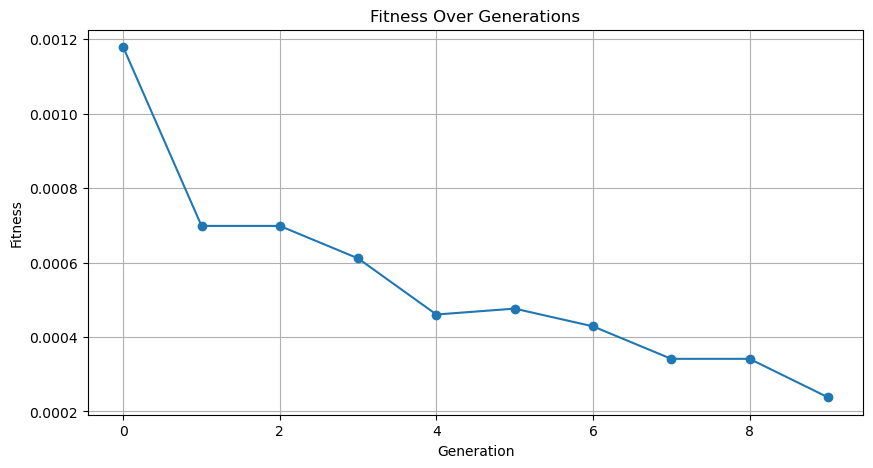

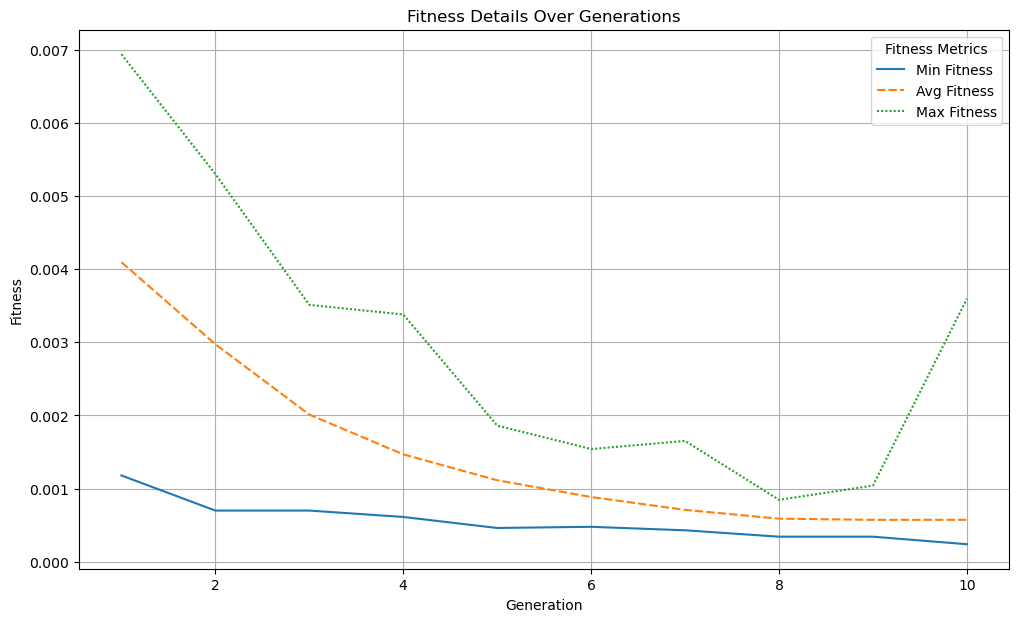

In [38]:
import Set_N_GA
train_C_GA1 = Set_N_GA.main(df_train, columns, config_GA, population, 1)

## GA2

2024-05-29 14:38:34,623 - INFO - Initializing GA with population size: 50
2024-05-29 14:40:18,079 - INFO - New best fitness found: 0.001179
2024-05-29 14:40:18,080 - INFO - Generation 0 complete. Best fitness: 0.001179


time taken in generation 0 : 103.4551 seconds


2024-05-29 14:42:04,228 - INFO - New best fitness found: 0.001063
2024-05-29 14:42:04,229 - INFO - Generation 1 complete. Best fitness: 0.001063


time taken in generation 1 : 106.1488 seconds


2024-05-29 14:43:46,881 - INFO - New best fitness found: 0.000881
2024-05-29 14:43:46,882 - INFO - Generation 2 complete. Best fitness: 0.000881


time taken in generation 2 : 102.6526 seconds


2024-05-29 14:45:29,291 - INFO - Generation 3 complete. Best fitness: 0.000881


time taken in generation 3 : 102.4086 seconds


2024-05-29 14:47:08,614 - INFO - New best fitness found: 0.000524
2024-05-29 14:47:08,615 - INFO - Generation 4 complete. Best fitness: 0.000524


time taken in generation 4 : 99.3226 seconds


2024-05-29 14:48:45,668 - INFO - New best fitness found: 0.000313
2024-05-29 14:48:45,668 - INFO - Generation 5 complete. Best fitness: 0.000313


time taken in generation 5 : 97.0534 seconds


2024-05-29 14:50:26,916 - INFO - New best fitness found: 0.000131
2024-05-29 14:50:26,916 - INFO - Generation 6 complete. Best fitness: 0.000131


time taken in generation 6 : 101.2473 seconds


2024-05-29 14:52:08,079 - INFO - New best fitness found: 0.000107
2024-05-29 14:52:08,080 - INFO - Generation 7 complete. Best fitness: 0.000107


time taken in generation 7 : 101.1632 seconds


2024-05-29 14:53:53,834 - INFO - New best fitness found: 0.000079
2024-05-29 14:53:53,835 - INFO - Generation 8 complete. Best fitness: 0.000079


time taken in generation 8 : 105.7547 seconds


2024-05-29 14:55:38,124 - INFO - Generation 9 complete. Best fitness: 0.000079


time taken in generation 9 : 104.2883 seconds
best_individual, [45, 128, 105, 46, 88, 81, 72, 30, 11, 54, 2, 92, 84, 10, 121, 106, 93, 138, 76, 51, 87, 82, 77, 16, 31, 3, 38, 102, 97, 28]
Set_N      laufkont  laufzeit  moral  verw     hoehe  sparkont  beszeit      rate  \
45   1.000000  0.117647   1.00   0.6  0.096952      1.00     0.75  1.000000   
128  1.000000  0.294118   0.50   0.3  0.071641      0.00     0.75  0.666667   
105  1.000000  0.029412   1.00   0.3  0.081985      0.00     1.00  0.333333   
46   0.666667  0.294118   1.00   0.2  0.185265      1.00     1.00  1.000000   
88   1.000000  0.073529   1.00   0.3  0.155387      1.00     0.50  0.000000   
81   1.000000  0.205882   0.50   0.2  0.095411      0.00     0.50  1.000000   
72   1.000000  0.161765   0.50   0.0  0.181908      1.00     0.50  0.666667   
30   0.000000  0.161765   0.50   0.2  0.087763      0.00     0.25  1.000000   
11   1.000000  0.073529   1.00   0.2  0.118631      0.00     0.00  0.333333   
54   1.000000  0

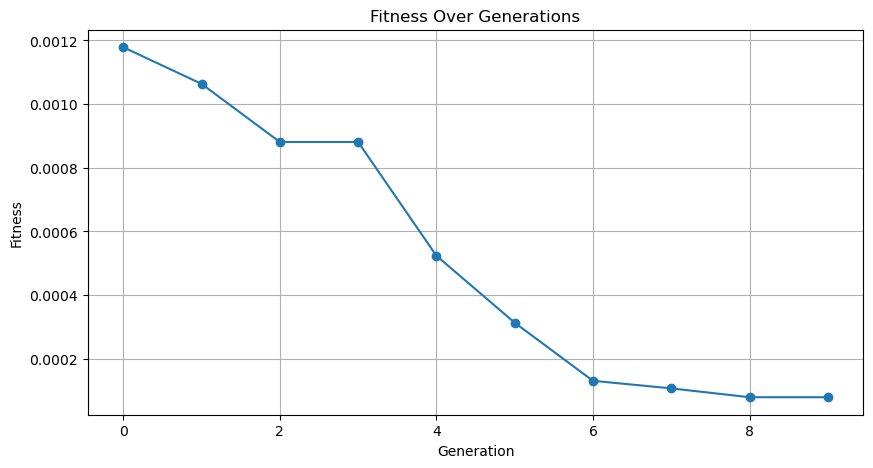

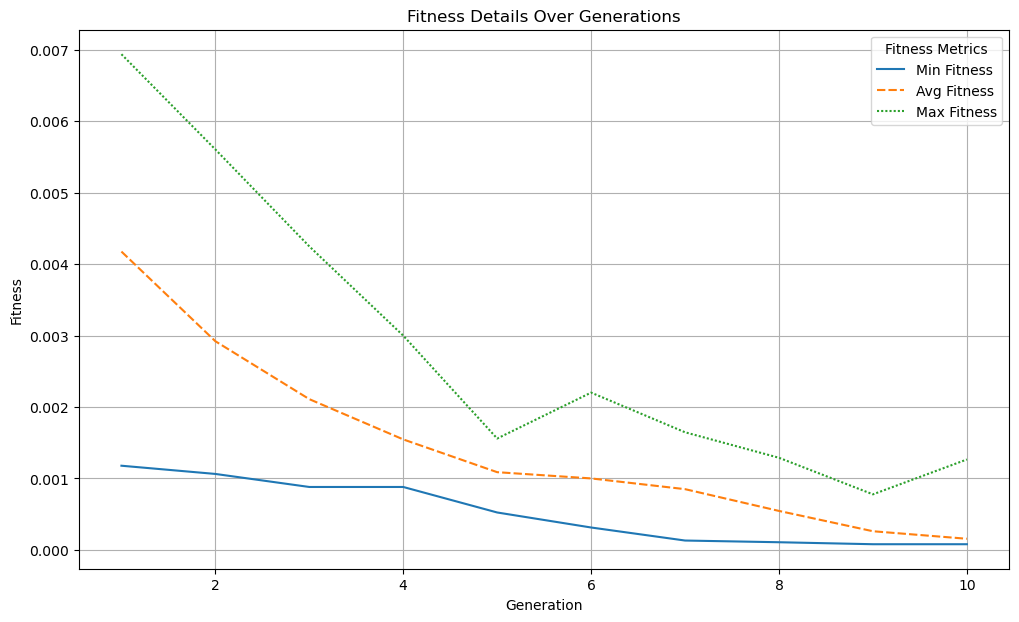

In [39]:
train_C_GA2 = Set_N_GA.main(df_train, columns, config_GA, population, 2)

## GA3

2024-05-29 14:55:38,364 - INFO - Initializing GA with population size: 50
2024-05-29 14:57:25,618 - INFO - New best fitness found: 0.001179
2024-05-29 14:57:25,618 - INFO - Generation 0 complete. Best fitness: 0.001179


time taken in generation 0 : 107.2539 seconds


2024-05-29 14:59:12,008 - INFO - Generation 1 complete. Best fitness: 0.001179


time taken in generation 1 : 106.3891 seconds


2024-05-29 15:00:54,593 - INFO - New best fitness found: 0.000964
2024-05-29 15:00:54,593 - INFO - Generation 2 complete. Best fitness: 0.000964


time taken in generation 2 : 102.5849 seconds


2024-05-29 15:02:34,727 - INFO - New best fitness found: 0.000571
2024-05-29 15:02:34,728 - INFO - Generation 3 complete. Best fitness: 0.000571


time taken in generation 3 : 100.1343 seconds


2024-05-29 15:04:15,198 - INFO - Generation 4 complete. Best fitness: 0.000571


time taken in generation 4 : 100.4692 seconds


2024-05-29 15:05:55,023 - INFO - New best fitness found: 0.000433
2024-05-29 15:05:55,024 - INFO - Generation 5 complete. Best fitness: 0.000433


time taken in generation 5 : 99.8256 seconds


2024-05-29 15:07:35,260 - INFO - New best fitness found: 0.000405
2024-05-29 15:07:35,261 - INFO - Generation 6 complete. Best fitness: 0.000405


time taken in generation 6 : 100.2363 seconds


2024-05-29 15:09:17,832 - INFO - New best fitness found: 0.000218
2024-05-29 15:09:17,833 - INFO - Generation 7 complete. Best fitness: 0.000218


time taken in generation 7 : 102.5718 seconds


2024-05-29 15:10:57,540 - INFO - New best fitness found: 0.000139
2024-05-29 15:10:57,540 - INFO - Generation 8 complete. Best fitness: 0.000139


time taken in generation 8 : 99.7068 seconds


2024-05-29 15:12:41,248 - INFO - Generation 9 complete. Best fitness: 0.000139


time taken in generation 9 : 103.7073 seconds
best_individual, [6, 128, 105, 72, 10, 135, 23, 77, 92, 93, 16, 76, 106, 55, 56, 73, 96, 81, 11, 125, 102, 26, 30, 87, 97, 54, 82, 52, 38, 51]
Set_N      laufkont  laufzeit  moral  verw     hoehe  sparkont  beszeit      rate  \
6    0.000000  0.029412   1.00   0.0  0.022890      0.75     0.75  0.666667   
128  1.000000  0.294118   0.50   0.3  0.071641      0.00     0.75  0.666667   
105  1.000000  0.029412   1.00   0.3  0.081985      0.00     1.00  0.333333   
72   1.000000  0.161765   0.50   0.0  0.181908      1.00     0.50  0.666667   
10   1.000000  0.102941   0.50   0.9  0.104105      0.75     1.00  0.000000   
135  1.000000  0.117647   1.00   0.3  0.025696      0.00     1.00  1.000000   
23   1.000000  0.558824   0.50   0.3  0.380544      1.00     0.75  0.333333   
77   1.000000  0.117647   0.50   0.1  0.063993      0.75     0.75  0.666667   
92   0.000000  0.117647   0.50   0.2  0.025201      0.00     0.50  0.333333   
93   0.000000  

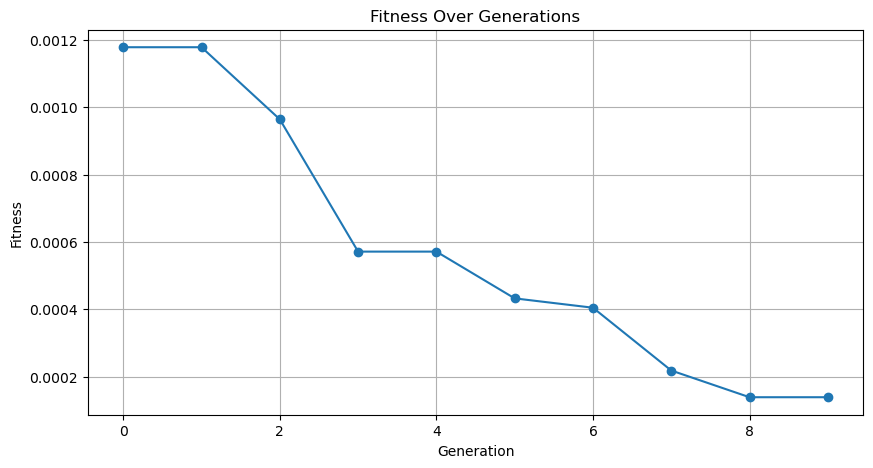

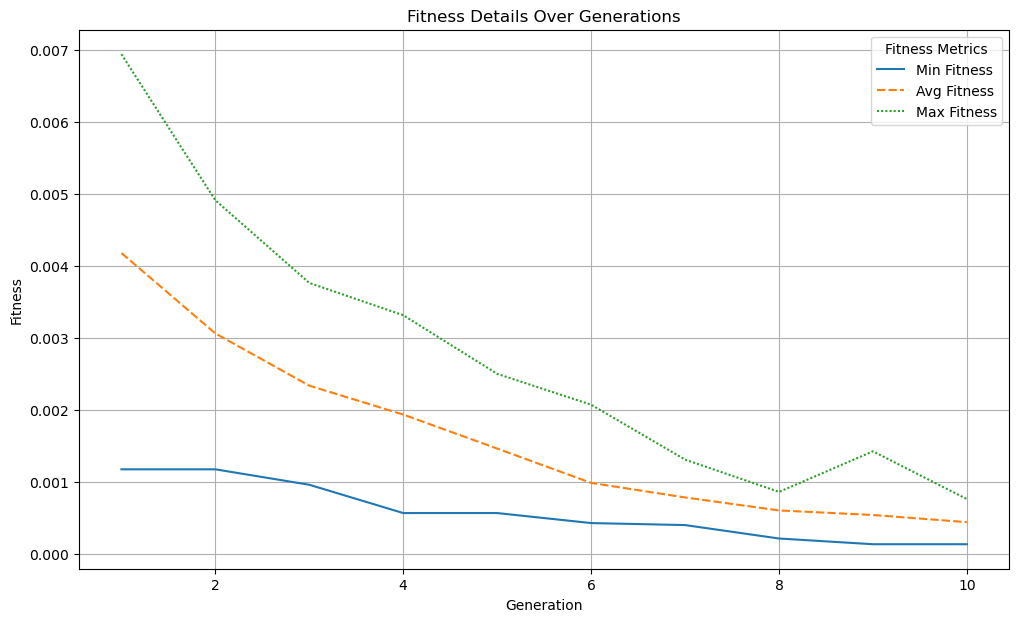

In [40]:
train_C_GA3 = Set_N_GA.main(df_train, columns, config_GA, population, 3)

## GA4

2024-05-29 15:12:41,504 - INFO - Initializing GA with population size: 50
2024-05-29 15:14:19,099 - INFO - New best fitness found: 0.001179
2024-05-29 15:14:19,100 - INFO - Generation 0 complete. Best fitness: 0.001179


time taken in generation 0 : 97.5958 seconds


2024-05-29 15:15:55,639 - INFO - Generation 1 complete. Best fitness: 0.001179


time taken in generation 1 : 96.5388 seconds


2024-05-29 15:17:33,867 - INFO - Generation 2 complete. Best fitness: 0.001179


time taken in generation 2 : 98.2272 seconds


2024-05-29 15:19:11,620 - INFO - Generation 3 complete. Best fitness: 0.001179


time taken in generation 3 : 97.7524 seconds


2024-05-29 15:20:49,425 - INFO - Generation 4 complete. Best fitness: 0.001179


time taken in generation 4 : 97.8045 seconds


2024-05-29 15:22:27,584 - INFO - Generation 5 complete. Best fitness: 0.001179


time taken in generation 5 : 98.1577 seconds


2024-05-29 15:24:05,634 - INFO - New best fitness found: 0.000790
2024-05-29 15:24:05,634 - INFO - Generation 6 complete. Best fitness: 0.000790


time taken in generation 6 : 98.0498 seconds


2024-05-29 15:25:43,353 - INFO - New best fitness found: 0.000270
2024-05-29 15:25:43,354 - INFO - Generation 7 complete. Best fitness: 0.000270


time taken in generation 7 : 97.7188 seconds


2024-05-29 15:27:21,079 - INFO - Generation 8 complete. Best fitness: 0.000270


time taken in generation 8 : 97.7253 seconds


2024-05-29 15:28:58,858 - INFO - Generation 9 complete. Best fitness: 0.000270


time taken in generation 9 : 97.7779 seconds
best_individual, [74, 105, 72, 85, 46, 4, 16, 1, 55, 54, 82, 138, 56, 88, 91, 6, 94, 77, 97, 102, 30, 3, 2, 136, 19, 52, 26, 31, 38, 58]
Set_N      laufkont  laufzeit  moral  verw     hoehe  sparkont  beszeit      rate  \
74   1.000000  0.073529   1.00   0.0  0.103665      0.00     0.50  1.000000   
105  1.000000  0.029412   1.00   0.3  0.081985      0.00     1.00  0.333333   
72   1.000000  0.161765   0.50   0.0  0.181908      1.00     0.50  0.666667   
85   0.333333  0.073529   0.50   0.3  0.029713      0.50     0.50  1.000000   
46   0.666667  0.294118   1.00   0.2  0.185265      1.00     1.00  1.000000   
4    0.333333  0.117647   0.50   0.9  0.043304      0.25     0.75  0.666667   
16   0.333333  0.029412   0.50   0.3  0.027677      0.00     0.50  0.333333   
1    0.333333  0.558824   1.00   0.9  0.313855      0.00     0.75  0.333333   
55   1.000000  0.294118   0.50   0.3  0.157093      1.00     0.25  1.000000   
54   1.000000  0.02941

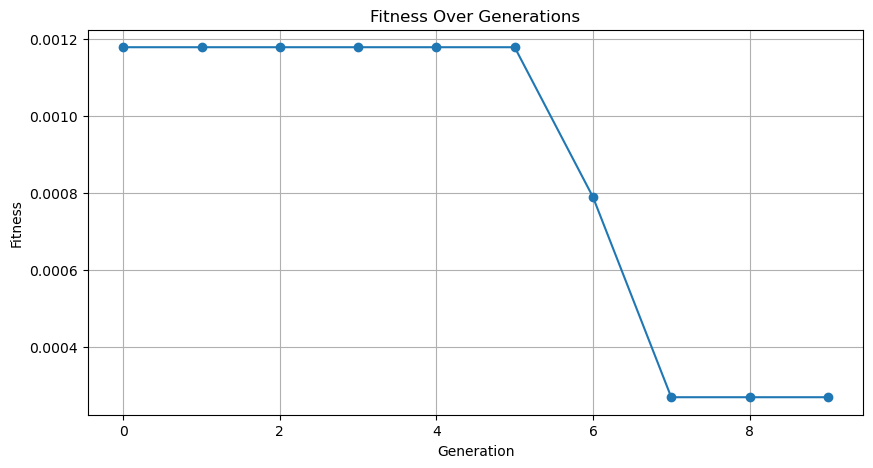

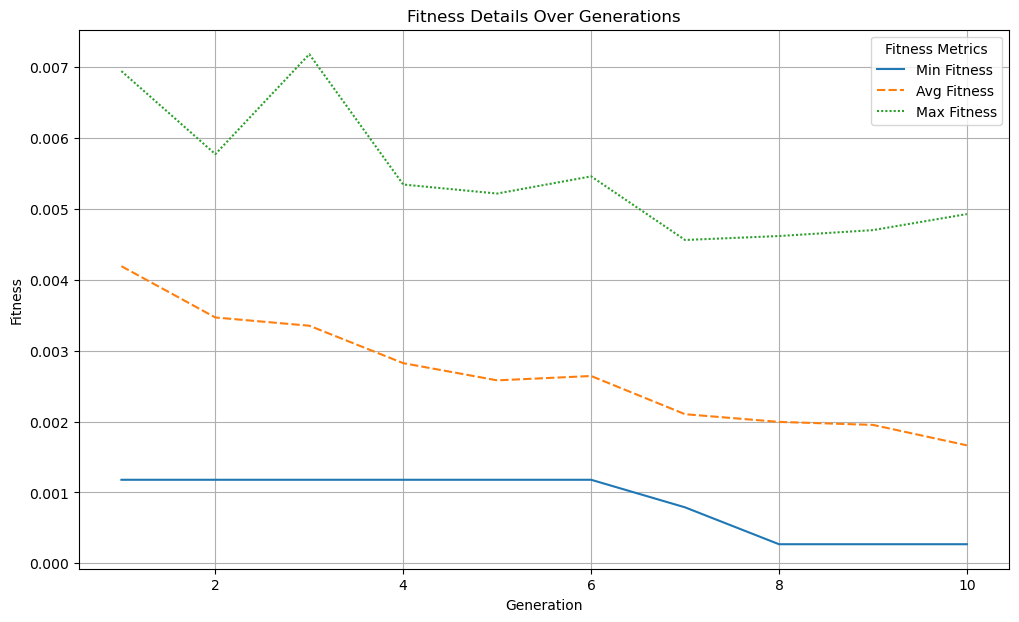

In [41]:
train_C_GA4 = Set_N_GA.main(df_train, columns, config_GA, population, 4)

## GA5

2024-05-29 15:28:59,097 - INFO - Initializing GA with population size: 50
2024-05-29 15:30:36,926 - INFO - New best fitness found: 0.001151
2024-05-29 15:30:36,927 - INFO - Generation 0 complete. Best fitness: 0.001151


time taken in generation 0 : 97.8295 seconds


2024-05-29 15:32:16,311 - INFO - Generation 1 complete. Best fitness: 0.001151


time taken in generation 1 : 99.3843 seconds


2024-05-29 15:34:02,725 - INFO - Generation 2 complete. Best fitness: 0.001151


time taken in generation 2 : 106.4132 seconds


2024-05-29 15:35:45,922 - INFO - Generation 3 complete. Best fitness: 0.001151


time taken in generation 3 : 103.1961 seconds


2024-05-29 15:37:28,933 - INFO - New best fitness found: 0.000675
2024-05-29 15:37:28,934 - INFO - Generation 4 complete. Best fitness: 0.000675


time taken in generation 4 : 103.0112 seconds


2024-05-29 15:39:06,748 - INFO - Generation 5 complete. Best fitness: 0.000675


time taken in generation 5 : 97.8138 seconds


2024-05-29 15:40:43,601 - INFO - Generation 6 complete. Best fitness: 0.000675


time taken in generation 6 : 96.8523 seconds


2024-05-29 15:42:20,095 - INFO - New best fitness found: 0.000575
2024-05-29 15:42:20,096 - INFO - Generation 7 complete. Best fitness: 0.000575


time taken in generation 7 : 96.4941 seconds


2024-05-29 15:43:56,316 - INFO - New best fitness found: 0.000329
2024-05-29 15:43:56,317 - INFO - Generation 8 complete. Best fitness: 0.000329


time taken in generation 8 : 96.2209 seconds


2024-05-29 15:45:32,641 - INFO - Generation 9 complete. Best fitness: 0.000329


time taken in generation 9 : 96.3238 seconds
best_individual, [91, 88, 85, 45, 3, 31, 125, 58, 4, 56, 62, 97, 30, 55, 136, 54, 73, 38, 51, 87, 76, 81, 68, 121, 6, 19, 82, 26, 52, 2]
Set_N      laufkont  laufzeit  moral  verw     hoehe  sparkont  beszeit      rate  \
91   0.333333  0.117647   0.50   0.2  0.152250      0.00     0.25  0.666667   
88   1.000000  0.073529   1.00   0.3  0.155387      1.00     0.50  0.000000   
85   0.333333  0.073529   0.50   0.3  0.029713      0.50     0.50  1.000000   
45   1.000000  0.117647   1.00   0.6  0.096952      1.00     0.75  1.000000   
3    1.000000  0.014706   0.50   0.9  0.175966      0.00     0.75  0.000000   
31   1.000000  0.000000   0.50   0.2  0.019313      0.00     0.25  0.000000   
125  1.000000  0.338235   0.75   0.1  0.460163      0.75     0.50  0.333333   
58   1.000000  0.294118   0.50   0.3  0.161274      0.00     0.25  1.000000   
4    0.333333  0.117647   0.50   0.9  0.043304      0.25     0.75  0.666667   
56   0.666667  0.11764

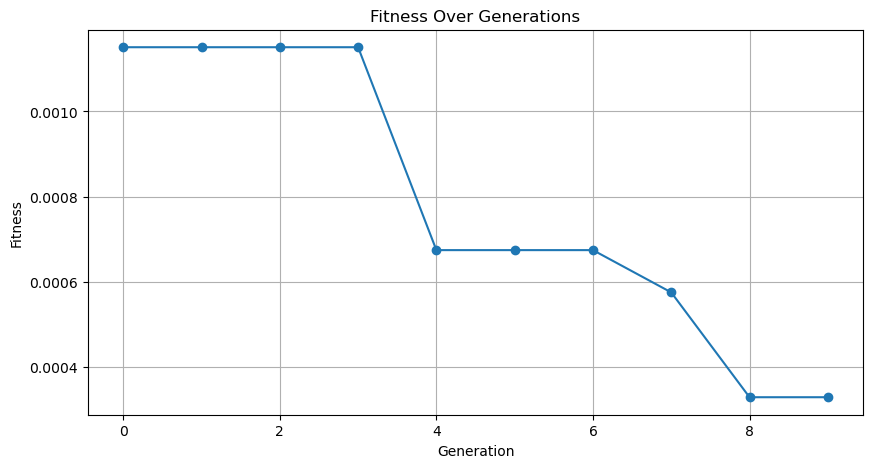

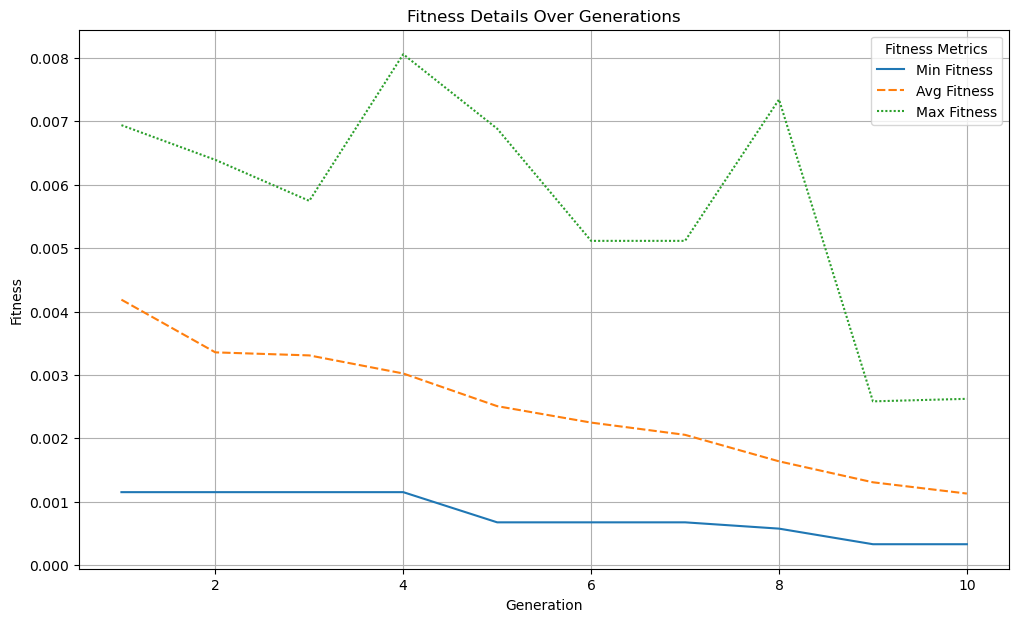

In [42]:
train_C_GA5 = Set_N_GA.main(df_train, columns, config_GA, population, 5)

## GA6

2024-05-29 15:45:32,881 - INFO - Initializing GA with population size: 50
2024-05-29 15:47:10,788 - INFO - New best fitness found: 0.001151
2024-05-29 15:47:10,789 - INFO - Generation 0 complete. Best fitness: 0.001151


time taken in generation 0 : 97.9068 seconds


2024-05-29 15:48:53,739 - INFO - Generation 1 complete. Best fitness: 0.001151


time taken in generation 1 : 102.9501 seconds


2024-05-29 15:50:34,417 - INFO - Generation 2 complete. Best fitness: 0.001151


time taken in generation 2 : 100.6775 seconds


2024-05-29 15:52:12,150 - INFO - New best fitness found: 0.001115
2024-05-29 15:52:12,151 - INFO - Generation 3 complete. Best fitness: 0.001115


time taken in generation 3 : 97.7327 seconds


2024-05-29 15:53:55,162 - INFO - Generation 4 complete. Best fitness: 0.001115


time taken in generation 4 : 103.0106 seconds


2024-05-29 15:55:41,181 - INFO - New best fitness found: 0.000611
2024-05-29 15:55:41,181 - INFO - Generation 5 complete. Best fitness: 0.000611


time taken in generation 5 : 106.0186 seconds


2024-05-29 15:57:26,010 - INFO - New best fitness found: 0.000456
2024-05-29 15:57:26,011 - INFO - Generation 6 complete. Best fitness: 0.000456


time taken in generation 6 : 104.8293 seconds


2024-05-29 15:59:12,170 - INFO - Generation 7 complete. Best fitness: 0.000456


time taken in generation 7 : 106.1583 seconds


2024-05-29 16:00:58,581 - INFO - Generation 8 complete. Best fitness: 0.000456


time taken in generation 8 : 106.4110 seconds


2024-05-29 16:02:45,237 - INFO - New best fitness found: 0.000345
2024-05-29 16:02:45,238 - INFO - Generation 9 complete. Best fitness: 0.000345


time taken in generation 9 : 106.6560 seconds
best_individual, [46, 105, 88, 81, 72, 19, 56, 135, 97, 31, 54, 121, 68, 30, 85, 74, 4, 111, 84, 3, 1, 91, 38, 51, 6, 76, 106, 50, 93, 127]
Set_N      laufkont  laufzeit  moral  verw     hoehe  sparkont  beszeit      rate  \
46   0.666667  0.294118   1.00   0.2  0.185265      1.00     1.00  1.000000   
105  1.000000  0.029412   1.00   0.3  0.081985      0.00     1.00  0.333333   
88   1.000000  0.073529   1.00   0.3  0.155387      1.00     0.50  0.000000   
81   1.000000  0.205882   0.50   0.2  0.095411      0.00     0.50  1.000000   
72   1.000000  0.161765   0.50   0.0  0.181908      1.00     0.50  0.666667   
19   1.000000  0.161765   0.50   0.4  0.034335      1.00     0.25  1.000000   
56   0.666667  0.117647   1.00   0.0  0.067679      0.50     0.00  0.333333   
135  1.000000  0.117647   1.00   0.3  0.025696      0.00     1.00  1.000000   
97   0.333333  0.044118   0.50   0.3  0.114394      0.00     0.25  0.000000   
31   1.000000  0.0

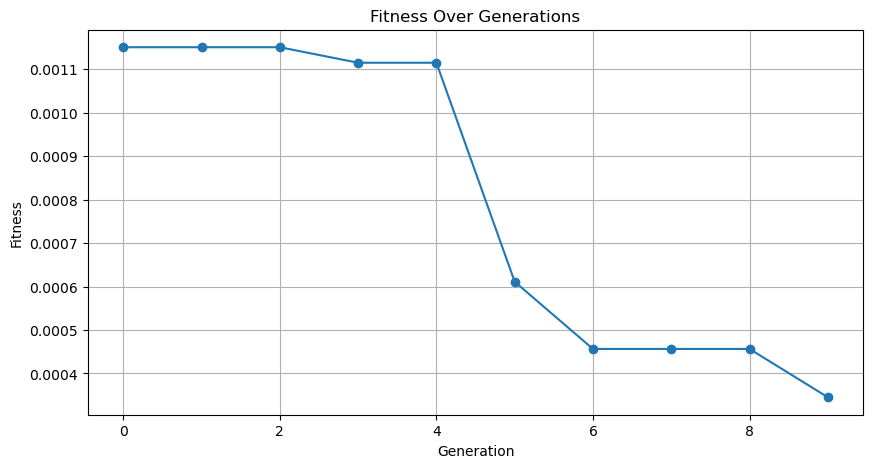

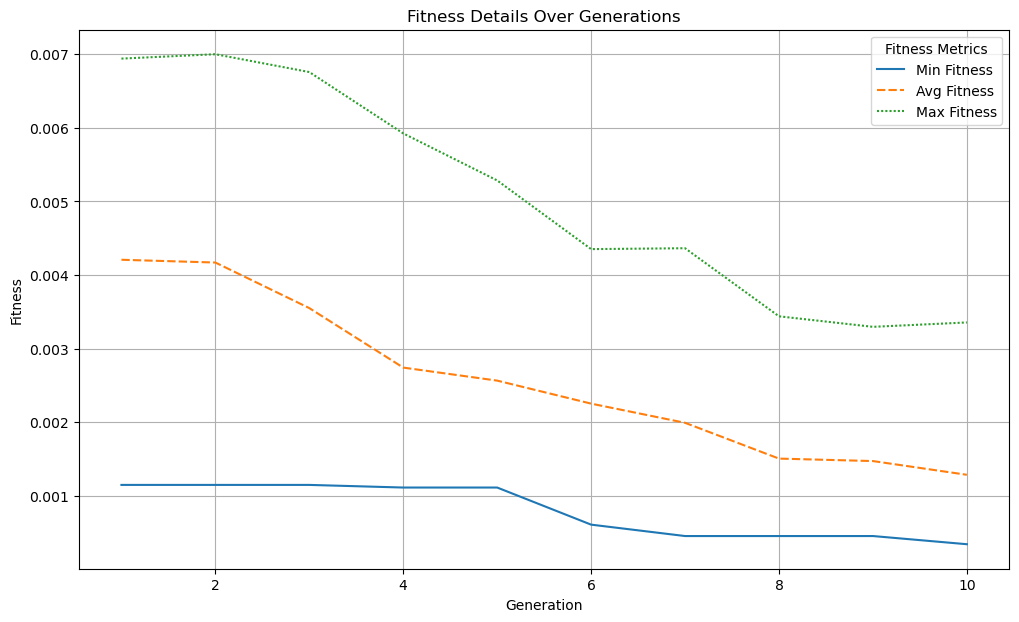

In [43]:
train_C_GA6 = Set_N_GA.main(df_train, columns, config_GA, population, 6)

## GA7

In [ ]:
#train_C_GA7 = Set_N_GA.main(df_train, columns, config_GA, 7)

## GA8

In [ ]:
#train_C_GA8 = Set_N_GA.main(df_train, columns, config_GA, 8)

## GA9

In [ ]:
#train_C_GA9 = Set_N_GA.main(df_train, columns, config_GA, 9)

## GA10

In [ ]:
#train_C_GA10 = Set_N_GA.main(df_train, columns, config_GA, 10)

# Complexity Measures

In [44]:
import Complexity

In [45]:
X4 = train_C_GA1.drop(columns=['class_label']).values.tolist()
y4 = train_C_GA1['class_label'].values.tolist()

X5 = train_C_GA2.drop(columns=['class_label']).values.tolist()
y5 = train_C_GA2['class_label'].values.tolist()

X6 = train_C_GA3.drop(columns=['class_label']).values.tolist()
y6 = train_C_GA3['class_label'].values.tolist()

X7 = train_C_GA4.drop(columns=['class_label']).values.tolist()
y7 = train_C_GA4['class_label'].values.tolist()

X8 = train_C_GA5.drop(columns=['class_label']).values.tolist()
y8 = train_C_GA5['class_label'].values.tolist()

X9 = train_C_GA6.drop(columns=['class_label']).values.tolist()
y9 = train_C_GA6['class_label'].values.tolist()

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Example usage:
datasets = [
    {"X": X1, "y": y1, "name": "Original Dataset"},
    {"X": X2, "y": y2, "name": "Random Concatenation"},
    {"X": X3, "y": y3, "name": "Weighted Concatenation"},
    {"X": X4, "y": y4, "name": "GA1"},
    {"X": X5, "y": y5, "name": "GA2"},
    {"X": X6, "y": y6, "name": "GA3"},
    {"X": X7, "y": y7, "name": "GA4"},
    {"X": X8, "y": y8, "name": "GA5"},
    {"X": X9, "y": y9, "name": "GA6"},
]

measures = ["Adapted_N1", "Adapted_N2", "Adapted_N3", "Adapted_CM"]

minority_measures = {measure: [] for measure in measures}
majority_measures = {measure: [] for measure in measures}



In [47]:
for dataset in datasets:
    complexity = Complexity.Complexity(dataset["X"], dataset["y"],distance_func="euclidean")

    n1_adapted = complexity.N1_adapted()
    minority_measures["Adapted_N1"].append(n1_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_N1"].append(n1_adapted[np.argmax(complexity.class_count)])

    n2_adapted = complexity.N2_adapted()
    minority_measures["Adapted_N2"].append(n2_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_N2"].append(n2_adapted[np.argmax(complexity.class_count)])
    
    n3_adapted = complexity.N3_adapted()
    minority_measures["Adapted_N3"].append(n3_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_N3"].append(n3_adapted[np.argmax(complexity.class_count)])
    
    cm_adapted = complexity.CM_adapted()
    minority_measures["Adapted_CM"].append(cm_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_CM"].append(cm_adapted[np.argmax(complexity.class_count)])
    print('dataset["X"]')

dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]


In [59]:
epsilon = 0.001
for c in minority_measures :
    for i in range(len(minority_measures['Adapted_N3'])):
        if minority_measures['Adapted_N3'][i] == 0 :
            minority_measures['Adapted_N3'][i] = epsilon

In [60]:
ep = 0.001
for c in majority_measures :
    for i in range(len(majority_measures['Adapted_N3'])):
        if majority_measures['Adapted_N3'][i] == 0 :
            majority_measures['Adapted_N3'][i] = ep

                   Dataset     Measure  Complexity     Class
0         Original Dataset  Adapted_N1    0.633333  Minority
1         Original Dataset  Adapted_N1    0.228571  Majority
2     Random Concatenation  Adapted_N1    0.002000  Minority
3     Random Concatenation  Adapted_N1    0.022619  Majority
4   Weighted Concatenation  Adapted_N1    0.002000  Minority
5   Weighted Concatenation  Adapted_N1    0.022143  Majority
6                      GA1  Adapted_N1    0.002000  Minority
7                      GA1  Adapted_N1    0.013333  Majority
8                      GA2  Adapted_N1    0.002000  Minority
9                      GA2  Adapted_N1    0.003810  Majority
10                     GA3  Adapted_N1    0.002000  Minority
11                     GA3  Adapted_N1    0.002143  Majority
12                     GA4  Adapted_N1    0.002000  Minority
13                     GA4  Adapted_N1    0.004524  Majority
14                     GA5  Adapted_N1    0.002000  Minority
15                     G

/tmp/ipykernel_6284/1195345811.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)


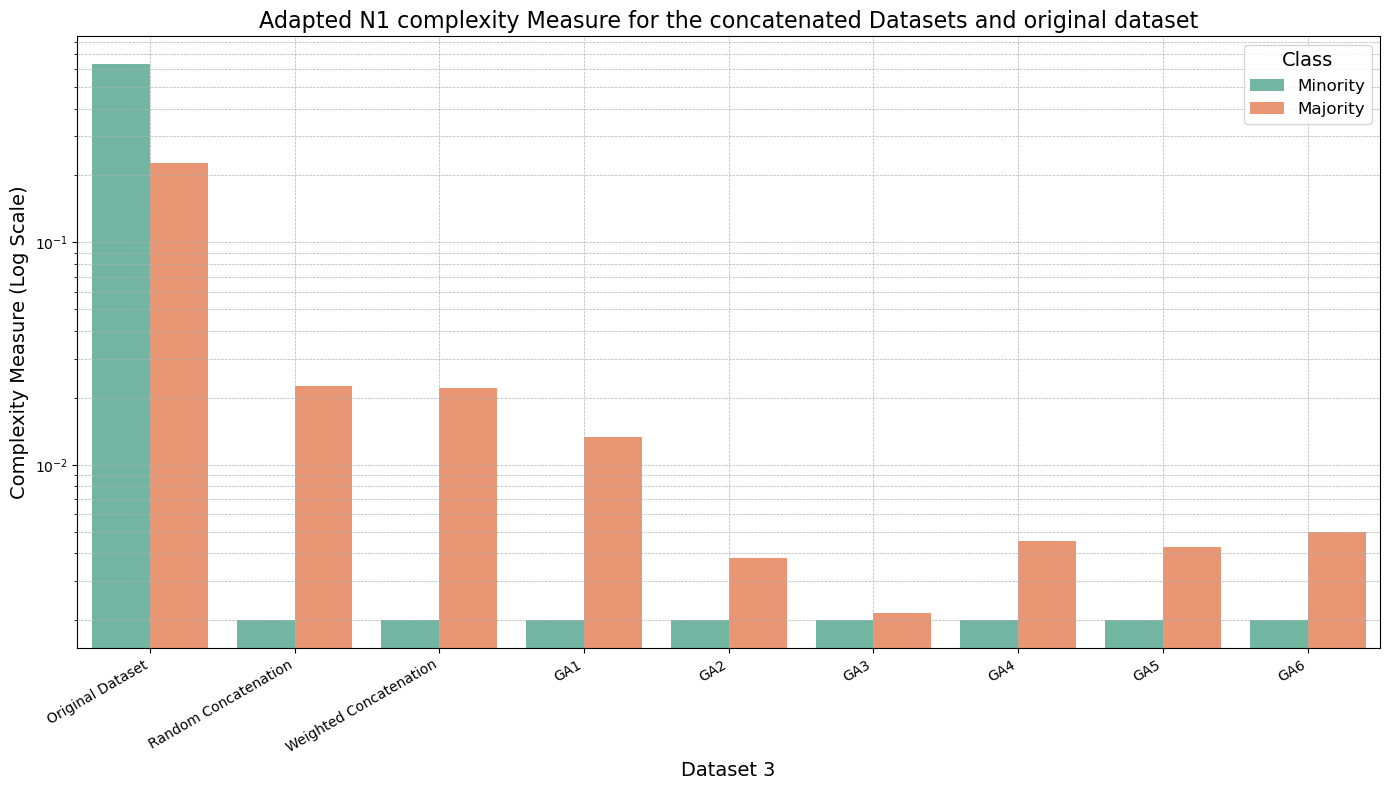

In [56]:
def plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35):
    # Prepare the data for plotting
    data = []
    for i, dataset in enumerate(datasets):
        
        #for measure in measures:
        data.append({'Dataset': dataset["name"], 'Measure': measures[0], 'Complexity': minority_measures[measures[0]][i], 'Class': 'Minority'})
        data.append({'Dataset': dataset["name"], 'Measure': measures[0], 'Complexity': majority_measures[measures[0]][i], 'Class': 'Majority'})

    # Combine data into a single DataFrame
    df = pd.DataFrame(data)
    print(df)

    # Plot settings
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create a barplot
    sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)

    # Customize the plot
    ax.set_title('Adapted N1 complexity Measure for the concatenated Datasets and original dataset', fontsize=16)
    ax.set_ylabel('Complexity Measure (Log Scale)', fontsize=14)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_xlabel('Dataset 3', fontsize=14)
    ax.legend(title='Class', fontsize=12, title_fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Rotate x-axis labels
    plt.xticks(rotation=30, ha='right')
    # Adjust layout for better fit
    plt.tight_layout()
    plt.show()

plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35)


                   Dataset     Measure  Complexity     Class
0         Original Dataset  Adapted_N2    1.041567  Minority
1         Original Dataset  Adapted_N2    0.848807  Majority
2     Random Concatenation  Adapted_N2    0.557917  Minority
3     Random Concatenation  Adapted_N2    0.512636  Majority
4   Weighted Concatenation  Adapted_N2    0.562319  Minority
5   Weighted Concatenation  Adapted_N2    0.541405  Majority
6                      GA1  Adapted_N2    0.532693  Minority
7                      GA1  Adapted_N2    0.504358  Majority
8                      GA2  Adapted_N2    0.521753  Minority
9                      GA2  Adapted_N2    0.509114  Majority
10                     GA3  Adapted_N2    0.521456  Minority
11                     GA3  Adapted_N2    0.490422  Majority
12                     GA4  Adapted_N2    0.525722  Minority
13                     GA4  Adapted_N2    0.500030  Majority
14                     GA5  Adapted_N2    0.528952  Minority
15                     G

/tmp/ipykernel_6284/219825667.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)


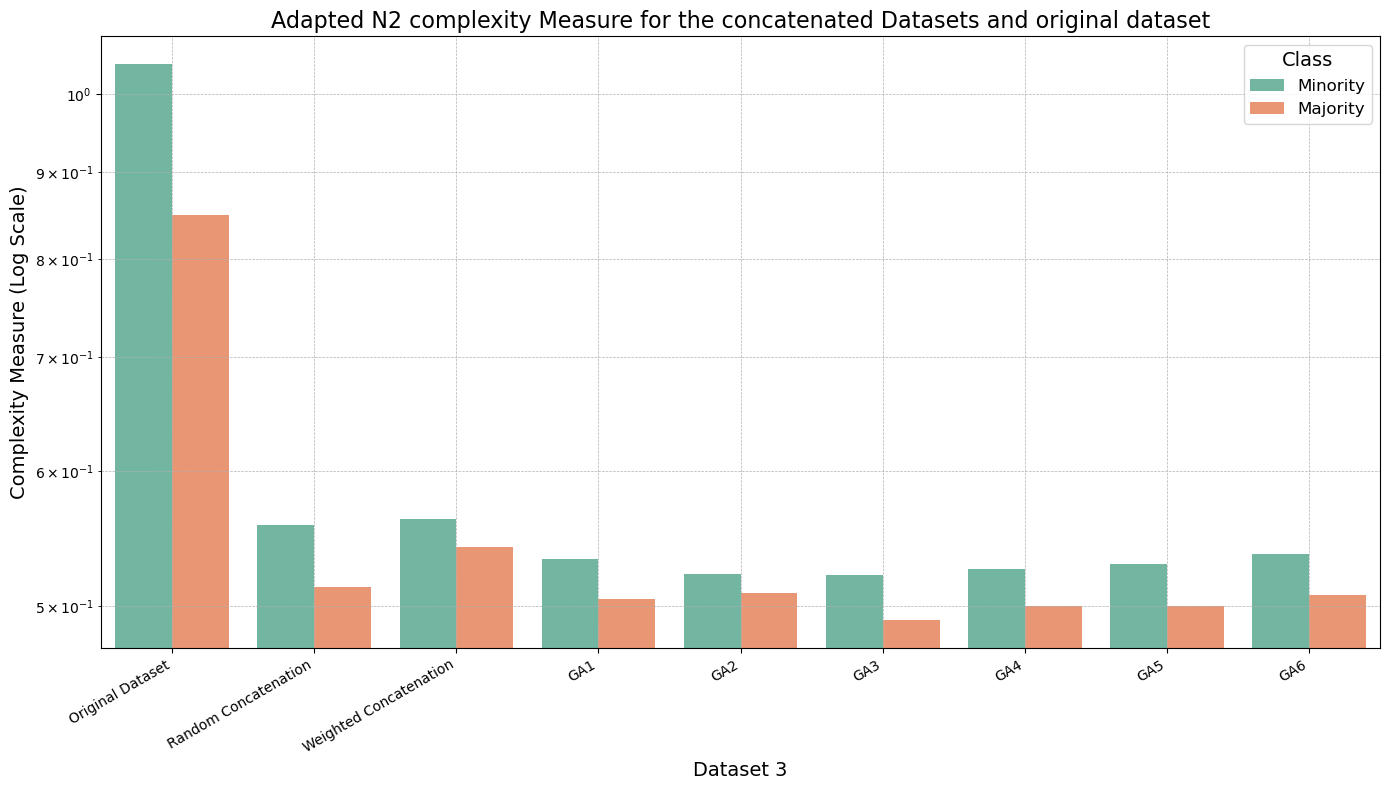

In [49]:
def plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35):
    # Prepare the data for plotting
    data = []
    for i, dataset in enumerate(datasets):
        
        #for measure in measures:
        data.append({'Dataset': dataset["name"], 'Measure': measures[1], 'Complexity': minority_measures[measures[1]][i], 'Class': 'Minority'})
        data.append({'Dataset': dataset["name"], 'Measure': measures[1], 'Complexity': majority_measures[measures[1]][i], 'Class': 'Majority'})

    # Combine data into a single DataFrame
    df = pd.DataFrame(data)
    print(df)

    # Plot settings
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create a barplot
    sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)

    # Customize the plot
    ax.set_title('Adapted N2 complexity Measure for the concatenated Datasets and original dataset', fontsize=16)
    ax.set_ylabel('Complexity Measure (Log Scale)', fontsize=14)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_xlabel('Dataset 3', fontsize=14)
    ax.legend(title='Class', fontsize=12, title_fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Rotate x-axis labels
    plt.xticks(rotation=30, ha='right')
    # Adjust layout for better fit
    plt.tight_layout()
    plt.show()

plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35)


                   Dataset     Measure  Complexity     Class
0         Original Dataset  Adapted_N3    0.616667  Minority
1         Original Dataset  Adapted_N3    0.228571  Majority
2     Random Concatenation  Adapted_N3    0.006389  Minority
3     Random Concatenation  Adapted_N3    0.002381  Majority
4   Weighted Concatenation  Adapted_N3    0.005000  Minority
5   Weighted Concatenation  Adapted_N3    0.002143  Majority
6                      GA1  Adapted_N3    0.001944  Minority
7                      GA1  Adapted_N3    0.001667  Majority
8                      GA2  Adapted_N3    0.001000  Minority
9                      GA2  Adapted_N3    0.001000  Majority
10                     GA3  Adapted_N3    0.001000  Minority
11                     GA3  Adapted_N3    0.001000  Majority
12                     GA4  Adapted_N3    0.001000  Minority
13                     GA4  Adapted_N3    0.001000  Majority
14                     GA5  Adapted_N3    0.001000  Minority
15                     G

/tmp/ipykernel_6284/709598655.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)


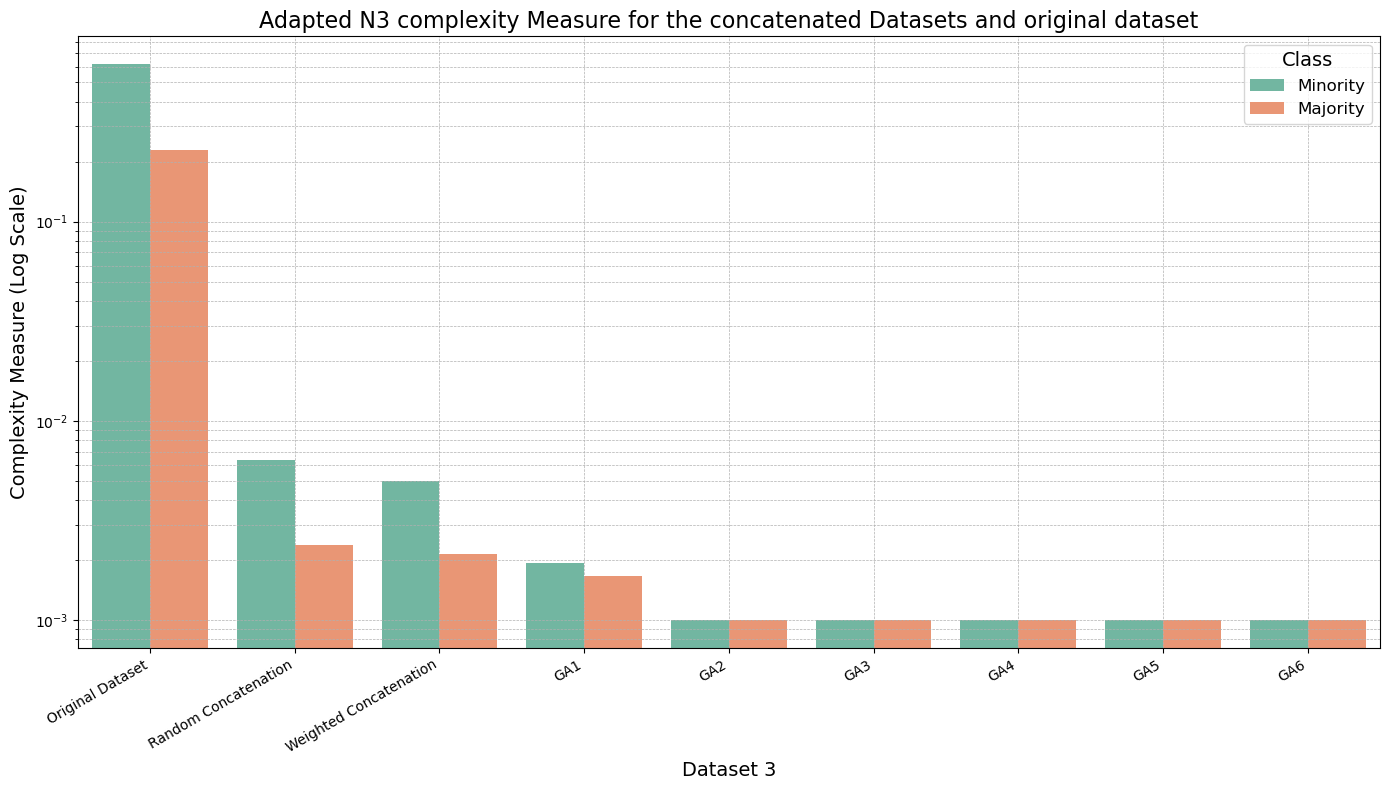

In [61]:
def plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35):
    # Prepare the data for plotting
    data = []
    for i, dataset in enumerate(datasets):
        
        #for measure in measures:
        data.append({'Dataset': dataset["name"], 'Measure': measures[2], 'Complexity': minority_measures[measures[2]][i], 'Class': 'Minority'})
        data.append({'Dataset': dataset["name"], 'Measure': measures[2], 'Complexity': majority_measures[measures[2]][i], 'Class': 'Majority'})

    # Combine data into a single DataFrame
    df = pd.DataFrame(data)
    print(df)

    # Plot settings
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create a barplot
    sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)

    # Customize the plot
    ax.set_title('Adapted N3 complexity Measure for the concatenated Datasets and original dataset', fontsize=16)
    ax.set_ylabel('Complexity Measure (Log Scale)', fontsize=14)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_xlabel('Dataset 3', fontsize=14)
    ax.legend(title='Class', fontsize=12, title_fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Rotate x-axis labels
    plt.xticks(rotation=30, ha='right')
    # Adjust layout for better fit
    plt.tight_layout()
    plt.show()

plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35)


                   Dataset     Measure  Complexity     Class
0         Original Dataset  Adapted_CM    0.950000  Minority
1         Original Dataset  Adapted_CM    0.628571  Majority
2     Random Concatenation  Adapted_CM    0.025833  Minority
3     Random Concatenation  Adapted_CM    0.011429  Majority
4   Weighted Concatenation  Adapted_CM    0.022500  Minority
5   Weighted Concatenation  Adapted_CM    0.017381  Majority
6                      GA1  Adapted_CM    0.009722  Minority
7                      GA1  Adapted_CM    0.004762  Majority
8                      GA2  Adapted_CM    0.000278  Minority
9                      GA2  Adapted_CM    0.000238  Majority
10                     GA3  Adapted_CM    0.000556  Minority
11                     GA3  Adapted_CM    0.000000  Majority
12                     GA4  Adapted_CM    0.000278  Minority
13                     GA4  Adapted_CM    0.000952  Majority
14                     GA5  Adapted_CM    0.000556  Minority
15                     G

/tmp/ipykernel_6284/4206116726.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)


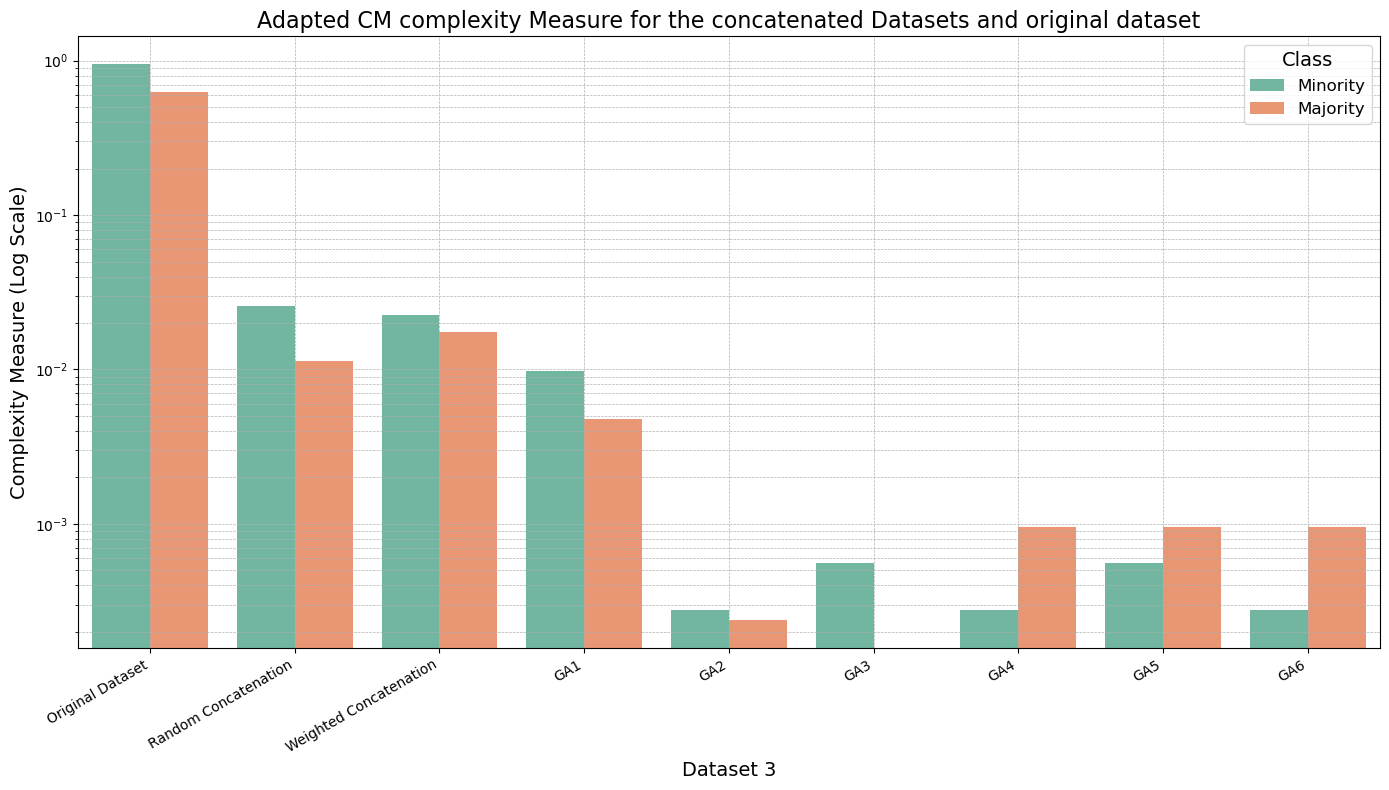

In [51]:
def plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35):
    # Prepare the data for plotting
    data = []
    for i, dataset in enumerate(datasets):
        
        #for measure in measures:
        data.append({'Dataset': dataset["name"], 'Measure': measures[3], 'Complexity': minority_measures[measures[3]][i], 'Class': 'Minority'})
        data.append({'Dataset': dataset["name"], 'Measure': measures[3], 'Complexity': majority_measures[measures[3]][i], 'Class': 'Majority'})

    # Combine data into a single DataFrame
    df = pd.DataFrame(data)
    print(df)

    # Plot settings
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create a barplot
    sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)

    # Customize the plot
    ax.set_title('Adapted CM complexity Measure for the concatenated Datasets and original dataset', fontsize=16)
    ax.set_ylabel('Complexity Measure (Log Scale)', fontsize=14)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_xlabel('Dataset 3', fontsize=14)
    ax.legend(title='Class', fontsize=12, title_fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Rotate x-axis labels
    plt.xticks(rotation=30, ha='right')
    # Adjust layout for better fit
    plt.tight_layout()
    plt.show()

plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35)


# MLP Evaluation

In [63]:
config = {
    'k_folds': 10,
    'random_seed': 42,
    'batch_size': 32,
    'learning_rate': 0.001,
    'num_epochs': 50,
    'early_stopping_patience': 5
}

In [64]:
#import MLP_6
import MLP_13
#import MLP_model

In [34]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [35]:
device

device(type='cuda')

In [36]:
MLP_13.main(df_train, config)

2024-05-29 11:42:02,060 - INFO - Starting repeat 1 of 10
2024-05-29 11:42:04,882 - INFO - Early stopping at epoch 24
2024-05-29 11:42:06,795 - INFO - Early stopping at epoch 22
2024-05-29 11:42:10,631 - INFO - Experiment Average Metrics: {'accuracy': 0.6787000000000002, 'f1': 0.031950582356576426, 'recall': 0.05533333333333333, 'roc_auc': 0.620227453102453, 'g_mean': 0.022474901428660148}
2024-05-29 11:42:10,632 - INFO - Experiment Train Losses: 0.6221548826566765
2024-05-29 11:42:10,632 - INFO - Experiment Validation Losses: 0.6144699938595295
2024-05-29 11:42:10,633 - INFO - Starting repeat 2 of 10
2024-05-29 11:42:11,428 - INFO - Early stopping at epoch 13
2024-05-29 11:42:12,691 - INFO - Early stopping at epoch 24
2024-05-29 11:42:13,727 - INFO - Early stopping at epoch 48
2024-05-29 11:42:16,034 - INFO - Experiment Average Metrics: {'accuracy': 0.6909166666666667, 'f1': 0.020449355466975606, 'recall': 0.030277777777777782, 'roc_auc': 0.6235224358974358, 'g_mean': 0.016680891093749

{'accuracy': 0.6867795147019828,
 'f1': 0.0201115223312867,
 'recall': 0.03352116308973697,
 'roc_auc': 0.606515081718685,
 'g_mean': 0.01432307837351801}

In [37]:
MLP_13.main(train_C_random, config)

2024-05-29 11:43:10,073 - INFO - Starting repeat 1 of 10
2024-05-29 11:46:20,497 - INFO - Experiment Average Metrics: {'accuracy': 0.9471179487179487, 'f1': 0.9413117022181667, 'recall': 0.9315222222222221, 'roc_auc': 0.9812222619047619, 'g_mean': 0.9456034422410238}
2024-05-29 11:46:20,498 - INFO - Experiment Train Losses: 0.19626796099138644
2024-05-29 11:46:20,499 - INFO - Experiment Validation Losses: 0.14902283032862945
2024-05-29 11:46:20,500 - INFO - Starting repeat 2 of 10
2024-05-29 11:49:15,081 - INFO - Experiment Average Metrics: {'accuracy': 0.9457615384615383, 'f1': 0.9397938492347053, 'recall': 0.9297666666666666, 'roc_auc': 0.9806821031746031, 'g_mean': 0.9442084885817355}
2024-05-29 11:49:15,082 - INFO - Experiment Train Losses: 0.19860330507596505
2024-05-29 11:49:15,083 - INFO - Experiment Validation Losses: 0.15162129073352196
2024-05-29 11:49:15,083 - INFO - Starting repeat 3 of 10
2024-05-29 11:52:14,585 - INFO - Experiment Average Metrics: {'accuracy': 0.945202564

{'accuracy': 0.9465466666666668,
 'f1': 0.9405104494797106,
 'recall': 0.9307383333333331,
 'roc_auc': 0.9809218650793652,
 'g_mean': 0.9449482158419069}

In [38]:
MLP_13.main(train_C_weighted, config)

2024-05-29 12:08:10,118 - INFO - Starting repeat 1 of 10
2024-05-29 12:10:54,462 - INFO - Experiment Average Metrics: {'accuracy': 0.9500512820512821, 'f1': 0.9438012461589574, 'recall': 0.9254833333333334, 'roc_auc': 0.9829480026455026, 'g_mean': 0.9476892077023841}
2024-05-29 12:10:54,463 - INFO - Experiment Train Losses: 0.18348803734352487
2024-05-29 12:10:54,463 - INFO - Experiment Validation Losses: 0.13769768197787927
2024-05-29 12:10:54,463 - INFO - Starting repeat 2 of 10
2024-05-29 12:13:41,689 - INFO - Experiment Average Metrics: {'accuracy': 0.9473846153846154, 'f1': 0.9406750941850526, 'recall': 0.9211833333333332, 'roc_auc': 0.9821176455026455, 'g_mean': 0.9448151821113118}
2024-05-29 12:13:41,689 - INFO - Experiment Train Losses: 0.1877900116522863
2024-05-29 12:13:41,689 - INFO - Experiment Validation Losses: 0.14291920672808056
2024-05-29 12:13:41,690 - INFO - Starting repeat 3 of 10
2024-05-29 12:16:30,265 - INFO - Experiment Average Metrics: {'accuracy': 0.9501461538

{'accuracy': 0.9496305128205127,
 'f1': 0.9434160691142216,
 'recall': 0.9257105555555556,
 'roc_auc': 0.9825181276455028,
 'g_mean': 0.9473261450137194}

In [39]:
MLP_13.main(train_C_GA1, config)

2024-05-29 12:32:35,671 - INFO - Starting repeat 1 of 10
2024-05-29 12:34:33,940 - INFO - Experiment Average Metrics: {'accuracy': 0.974776923076923, 'f1': 0.9717422005828757, 'recall': 0.9607666666666667, 'roc_auc': 0.9930038756613758, 'g_mean': 0.9734997485597114}
2024-05-29 12:34:33,940 - INFO - Experiment Train Losses: 0.1164806762861502
2024-05-29 12:34:33,941 - INFO - Experiment Validation Losses: 0.08028183729397734
2024-05-29 12:34:33,941 - INFO - Starting repeat 2 of 10
2024-05-29 12:34:45,760 - INFO - Early stopping at epoch 46
2024-05-29 12:36:46,331 - INFO - Experiment Average Metrics: {'accuracy': 0.9756896321070234, 'f1': 0.9726627960086176, 'recall': 0.9616864734299517, 'roc_auc': 0.9931497049689442, 'g_mean': 0.9743749448619573}
2024-05-29 12:36:46,331 - INFO - Experiment Train Losses: 0.11238038881867765
2024-05-29 12:36:46,332 - INFO - Experiment Validation Losses: 0.07780519477021165
2024-05-29 12:36:46,332 - INFO - Starting repeat 3 of 10
2024-05-29 12:38:55,444 - I

{'accuracy': 0.9750371683389073,
 'f1': 0.9719408278062055,
 'recall': 0.9609619806763285,
 'roc_auc': 0.9929844718196459,
 'g_mean': 0.9737087542469025}

In [40]:
MLP_13.main(train_C_GA2, config)

2024-05-29 12:54:47,654 - INFO - Starting repeat 1 of 10
2024-05-29 12:56:53,641 - INFO - Experiment Average Metrics: {'accuracy': 0.9730025641025641, 'f1': 0.9694315712614291, 'recall': 0.9570222222222222, 'roc_auc': 0.9913163888888888, 'g_mean': 0.9714377853600891}
2024-05-29 12:56:53,649 - INFO - Experiment Train Losses: 0.12099490934204846
2024-05-29 12:56:53,650 - INFO - Experiment Validation Losses: 0.08279191245007811
2024-05-29 12:56:53,650 - INFO - Starting repeat 2 of 10
2024-05-29 12:58:47,699 - INFO - Experiment Average Metrics: {'accuracy': 0.973297435897436, 'f1': 0.9699029950555275, 'recall': 0.9580777777777778, 'roc_auc': 0.9912494576719576, 'g_mean': 0.971860132667348}
2024-05-29 12:58:47,699 - INFO - Experiment Train Losses: 0.12000438237129062
2024-05-29 12:58:47,700 - INFO - Experiment Validation Losses: 0.08314058958587822
2024-05-29 12:58:47,700 - INFO - Starting repeat 3 of 10
2024-05-29 13:00:48,190 - INFO - Experiment Average Metrics: {'accuracy': 0.97253589743

{'accuracy': 0.9733559236002094,
 'f1': 0.9698647932395025,
 'recall': 0.957717925170068,
 'roc_auc': 0.9913976131222328,
 'g_mean': 0.9718345676000153}

In [65]:
MLP_13.main(train_C_GA3, config)

2024-05-29 16:26:03,349 - INFO - Starting repeat 1 of 10
2024-05-29 16:28:06,610 - INFO - Experiment Average Metrics: {'accuracy': 0.9755897435897436, 'f1': 0.9726014340380994, 'recall': 0.9615555555555554, 'roc_auc': 0.9926375925925924, 'g_mean': 0.9742888508900143}
2024-05-29 16:28:06,610 - INFO - Experiment Train Losses: 0.1181978467779677
2024-05-29 16:28:06,611 - INFO - Experiment Validation Losses: 0.08015710662456291
2024-05-29 16:28:06,611 - INFO - Starting repeat 2 of 10
2024-05-29 16:30:11,587 - INFO - Experiment Average Metrics: {'accuracy': 0.9740974358974359, 'f1': 0.9710736057770848, 'recall': 0.9593166666666667, 'roc_auc': 0.992428611111111, 'g_mean': 0.9727810990096847}
2024-05-29 16:30:11,588 - INFO - Experiment Train Losses: 0.11447326390343877
2024-05-29 16:30:11,589 - INFO - Experiment Validation Losses: 0.0807566741754168
2024-05-29 16:30:11,589 - INFO - Starting repeat 3 of 10
2024-05-29 16:32:12,843 - INFO - Experiment Average Metrics: {'accuracy': 0.973641025641

{'accuracy': 0.975064358974359,
 'f1': 0.9721129104307338,
 'recall': 0.9610622222222222,
 'roc_auc': 0.992575638227513,
 'g_mean': 0.9737923983711864}

In [66]:
MLP_13.main(train_C_GA4, config)

2024-05-29 16:48:14,432 - INFO - Starting repeat 1 of 10
2024-05-29 16:51:12,427 - INFO - Experiment Average Metrics: {'accuracy': 0.9716410256410256, 'f1': 0.9681627040462795, 'recall': 0.9573055555555555, 'roc_auc': 0.9913212962962963, 'g_mean': 0.9702885636024148}
2024-05-29 16:51:12,428 - INFO - Experiment Train Losses: 0.12137720093220024
2024-05-29 16:51:12,429 - INFO - Experiment Validation Losses: 0.08570234535203601
2024-05-29 16:51:12,429 - INFO - Starting repeat 2 of 10
2024-05-29 16:53:51,326 - INFO - Experiment Average Metrics: {'accuracy': 0.9727666666666666, 'f1': 0.9694986512872219, 'recall': 0.9603222222222222, 'roc_auc': 0.9914855952380954, 'g_mean': 0.9715850542973623}
2024-05-29 16:53:51,326 - INFO - Experiment Train Losses: 0.11722605584346533
2024-05-29 16:53:51,327 - INFO - Experiment Validation Losses: 0.08368437688325006
2024-05-29 16:53:51,327 - INFO - Starting repeat 3 of 10
2024-05-29 16:56:13,001 - INFO - Experiment Average Metrics: {'accuracy': 0.971384615

{'accuracy': 0.9719787779596291,
 'f1': 0.9686166144191484,
 'recall': 0.9584730614657212,
 'roc_auc': 0.9914493136327818,
 'g_mean': 0.9707092858621844}

In [67]:
MLP_13.main(train_C_GA5, config)

2024-05-29 17:09:34,971 - INFO - Starting repeat 1 of 10
2024-05-29 17:11:29,132 - INFO - Experiment Average Metrics: {'accuracy': 0.9712205128205127, 'f1': 0.9677101077354477, 'recall': 0.9553777777777777, 'roc_auc': 0.9911142724867723, 'g_mean': 0.9697505766612267}
2024-05-29 17:11:29,132 - INFO - Experiment Train Losses: 0.12474639522030842
2024-05-29 17:11:29,133 - INFO - Experiment Validation Losses: 0.08929103304556563
2024-05-29 17:11:29,133 - INFO - Starting repeat 2 of 10
2024-05-29 17:13:23,797 - INFO - Experiment Average Metrics: {'accuracy': 0.9704307692307692, 'f1': 0.9668449181375068, 'recall': 0.9547833333333333, 'roc_auc': 0.9908287566137565, 'g_mean': 0.9689721852411427}
2024-05-29 17:13:23,798 - INFO - Experiment Train Losses: 0.12950886431274808
2024-05-29 17:13:23,798 - INFO - Experiment Validation Losses: 0.09206237512033266
2024-05-29 17:13:23,798 - INFO - Starting repeat 3 of 10
2024-05-29 17:15:20,977 - INFO - Experiment Average Metrics: {'accuracy': 0.971151282

{'accuracy': 0.9702479214402618,
 'f1': 0.9666627339003382,
 'recall': 0.9543123049645389,
 'roc_auc': 0.9907454805527413,
 'g_mean': 0.9687732224947834}

In [68]:
MLP_13.main(train_C_GA6, config)

2024-05-29 17:29:44,340 - INFO - Starting repeat 1 of 10
2024-05-29 17:32:38,501 - INFO - Experiment Average Metrics: {'accuracy': 0.9667487179487179, 'f1': 0.9626717151297935, 'recall': 0.9505611111111112, 'roc_auc': 0.9883028968253968, 'g_mean': 0.9652058255219712}
2024-05-29 17:32:38,502 - INFO - Experiment Train Losses: 0.14540213329318333
2024-05-29 17:32:38,502 - INFO - Experiment Validation Losses: 0.10444904302124661
2024-05-29 17:32:38,502 - INFO - Starting repeat 2 of 10
2024-05-29 17:34:35,795 - INFO - Experiment Average Metrics: {'accuracy': 0.9666282051282051, 'f1': 0.9625213732138466, 'recall': 0.9506444444444444, 'roc_auc': 0.9883818121693123, 'g_mean': 0.9651053739694617}
2024-05-29 17:34:35,795 - INFO - Experiment Train Losses: 0.14760157666743384
2024-05-29 17:34:35,796 - INFO - Experiment Validation Losses: 0.10450715446279994
2024-05-29 17:34:35,796 - INFO - Starting repeat 3 of 10
2024-05-29 17:36:35,035 - INFO - Experiment Average Metrics: {'accuracy': 0.965194871

{'accuracy': 0.9645110256410254,
 'f1': 0.9601865298981537,
 'recall': 0.9474661111111111,
 'roc_auc': 0.9876929021164023,
 'g_mean': 0.9628948682441117}